In [69]:
import imgaug as ia
import imgaug.augmenters as iaa
from imgaug.augmentables.segmaps import SegmentationMapsOnImage
import imageio
import numpy as np

### load image and segmap

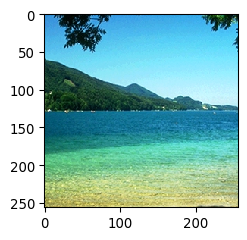

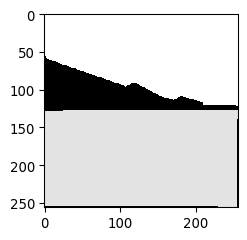

In [70]:
image=imageio.imread('data/train_5.jpg')
segmap=np.loadtxt('data/label_5.numpy', dtype=np.int32)
ia.imshow(image)
ia.imshow(segmap)

### Instantiate the segmap

In [71]:
segmentation = SegmentationMapsOnImage(segmap, shape=image.shape)

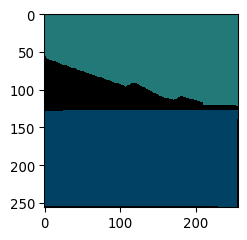

In [76]:
ia.imshow(segmentation.draw()[0])

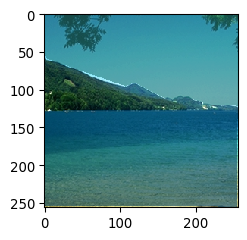

In [85]:
ia.imshow(segmentation.draw_on_image(image, alpha=0.6)[0])

### Augmenter sequential

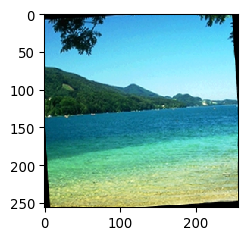

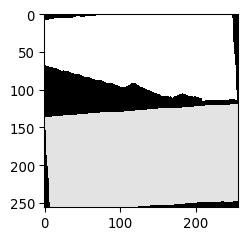

In [72]:
seq = iaa.Sequential([
    iaa.Affine(rotate=(-8, 8)),
    iaa.ElasticTransformation(alpha=4, sigma=5)
])
image_aug, segmap_aug = seq(image=image, segmentation_maps=segmentation)
ia.imshow(image_aug)
ia.imshow(segmap_aug.get_arr())

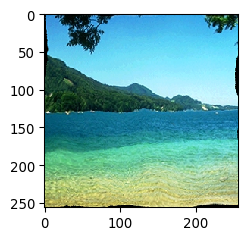

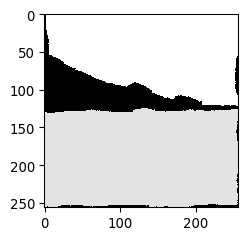

In [73]:
aug = iaa.ElasticTransformation(alpha=200, sigma=20)
im_aug, seg_aug = aug(image=image, segmentation_maps=segmentation)
ia.imshow(im_aug)
ia.imshow(seg_aug.get_arr())

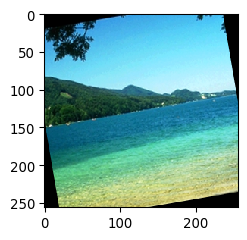

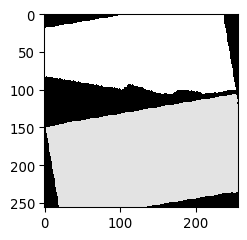

In [102]:
aug = iaa.CoarseDropout(0.06, size_percent=0.2)
im_aug, seg_aug = aug(image=image, segmentation_maps=segmentation)
ia.imshow(im_aug)
ia.imshow(seg_aug.get_arr())

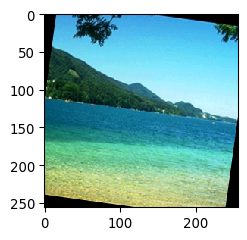

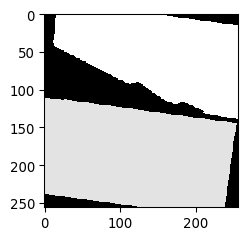

In [104]:
aug = iaa.Affine(rotate=(-10, 10))
im_aug, seg_aug = aug(image=image, segmentation_maps=segmentation)
ia.imshow(im_aug)
ia.imshow(seg_aug.get_arr())

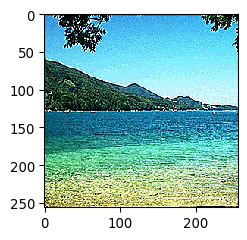

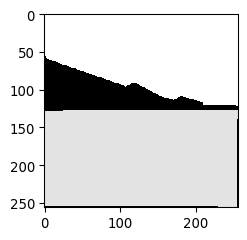

In [105]:
aug = iaa.Sharpen((0.0, 1.0))
im_aug, seg_aug = aug(image=image, segmentation_maps=segmentation)
ia.imshow(im_aug)
ia.imshow(seg_aug.get_arr())

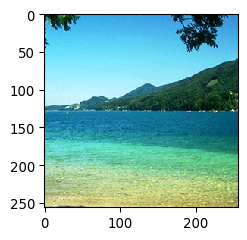

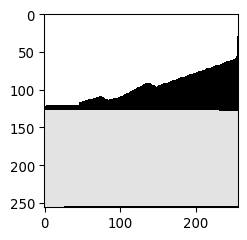

In [106]:
aug = iaa.Fliplr()
im_aug, seg_aug = aug(image=image, segmentation_maps=segmentation)
ia.imshow(im_aug)
ia.imshow(seg_aug.get_arr())

In [110]:
import matplotlib.image as mpimg
mpimg.imsave('seg.png', seg_aug.get_arr())